In [349]:
# Importing tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF

import gensim
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.ldamodel import LdaModel
from gensim import corpora
from gensim.models import Word2Vec

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

import time
import random
import os

import glob
import json

from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory
from pprint import pprint

#NLP 
import spacy
import scispacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re

import transformers
from transformers import AutoTokenizer

#import en_core_sci_lg


#from wordcloud import WordCloud, STOPWORDS
#nltk.download('stopwords')
#nltk.download('punkt')

#nltk.download('omw-1.4')
#nltk.download('wordnet')

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

from transformers import BertForSequenceClassification

from transformers import BertTokenizer

In [266]:
path = "C:/Users/rusta/OneDrive/Desktop/ADA/Final Master Thesis Materials/"

In [267]:
df = pd.read_csv(path + "LitCovid_textlg.csv").loc[:,'pmid':]
df_all = df

In [268]:
df

,pmid,text_lg,topic,topic_int,topic_lda,cluster_kmeans,language
0,36301867,nurse play important role pandemic disaster re...,Prevention,5,1,6,en
1,33535066,spread sars-cov-2 result disease covid-19 kill...,Prevention,5,1,4,en
2,35848556,covid-19 crisis long-term care canada characte...,Prevention,5,1,6,en
3,36631172,paper apply statistical method functional datu...,Epidemic Forecasting,1,1,2,en
4,36777001,pandemic coronavirus cause respiratory enteric...,Mechanism,3,1,0,en
...,...,...,...,...,...,...,...
21167,34249807,describe case series child sars-cov-2 infectio...,Case Report,0,1,4,en
21168,32360497,highlights failure anticipate spread sars-cov-...,Epidemic Forecasting,1,1,4,en
21169,32053470,background chest assess severity lung involvem...,Mechanism,3,1,5,en
21170,35418288,time covid19 epidemic/pandemic cardiac patient...,Prevention,5,1,4,en


In [269]:
df_test = pd.read_csv(path + "LitCovid_bert.csv").loc[:,'pmid':]

In [270]:
df_test

,pmid,topic,abstract_lg,topic_int,bert_preds
0,35949757,Case Report,mucormycosis opportunistic fungal infection ca...,0,0
1,36610390,Treatment,nasal mucosa important initial site host defen...,4,4
2,35148261,Mechanism,objective modification common ribonucleic acid...,3,3
3,32925503,Case Report,oligosymptomatic patient initially exclusively...,0,0
4,35690403,Prevention,model propose increase access home dialysis tr...,5,5
...,...,...,...,...,...
4273,33871421,Long Covid,purpose review despite significant progress un...,2,2
4274,32804803,Prevention,background coronavirus disease covid-19 pandem...,5,5
4275,36002399,Long Covid,people survive covid-19 experience negative pe...,2,2
4276,35252760,Diagnosis,deadly novel coronavirus sars-cov-2 responsibl...,6,6


In [271]:
df = df[~df['pmid'].isin(df_test['pmid'])]

In [330]:
mapping = {
    'Case Report': 0,
    'Epidemic Forecasting': 1,
    'Long Covid': 2,
    'Mechanism': 3,
    'Treatment': 4,
    'Prevention': 5,
    'Diagnosis': 6
}

'''
scibert:
0 -> Long Covid
1 -> Treatment
2 -> Prevention
3 -> Epidemic Forecasting
4 -> Diagnosis
5 -> Case Report
6 -> Mechanism


biobert:
0 -> Epidemic Forecasting
1 -> Diagnosis
2 -> Case Report
3 -> Mechanism
4 -> Prevention
5 -> Long Covid
6 -> Treatment
'''

'\nscibert:\n\nbiobert:\n0 -> Epidemic Forecasting\n1 -> Diagnosis\n2 -> Case Report\n3 -> Mechanism\n4 -> Prevention\n5 -> Long Covid\n6 -> Treatment\n'

In [273]:
df['topic_int'] = df['topic'].map(mapping)
df_all['topic_int'] = df_all['topic'].map(mapping)
df

C:\Users\rusta\AppData\Local\Temp\ipykernel_32244\3710477861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_int'] = df['topic'].map(mapping)


,pmid,text_lg,topic,topic_int,topic_lda,cluster_kmeans,language
0,36301867,nurse play important role pandemic disaster re...,Prevention,5,1,6,en
1,33535066,spread sars-cov-2 result disease covid-19 kill...,Prevention,5,1,4,en
2,35848556,covid-19 crisis long-term care canada characte...,Prevention,5,1,6,en
3,36631172,paper apply statistical method functional datu...,Epidemic Forecasting,1,1,2,en
4,36777001,pandemic coronavirus cause respiratory enteric...,Mechanism,3,1,0,en
...,...,...,...,...,...,...,...
21167,34249807,describe case series child sars-cov-2 infectio...,Case Report,0,1,4,en
21168,32360497,highlights failure anticipate spread sars-cov-...,Epidemic Forecasting,1,1,4,en
21169,32053470,background chest assess severity lung involvem...,Mechanism,3,1,5,en
21170,35418288,time covid19 epidemic/pandemic cardiac patient...,Prevention,5,1,4,en


In [274]:
# Tokenize the preprocessed text
tokenized_text = [text.split() for text in df["text_lg"]]

In [323]:
# Train a Word2Vec model on the tokenized text
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=3, min_count=1, workers=4, epochs=250)

# Save the trained model
w2v_model.save("word2vec.model")

In [ ]:
#Loading the trained model
w2v_model = Word2Vec.load("word2vec.model")

In [292]:
def text_to_vector(text):
    words = text.split()
    vectors = [w2v_model.wv.get_vector(word) for word in words if word in w2v_model.wv.key_to_index]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return None


In [294]:
# Convert the text data in the DataFrame to dense vectors
df["w2v_vectors"] = df["text_lg"].apply(text_to_vector)
df_test["w2v_vectors"] = df_test["abstract_lg"].apply(text_to_vector)
df_all['w2v_vectors'] = df_all['text_lg'].apply(text_to_vector)

C:\Users\rusta\AppData\Local\Temp\ipykernel_32244\3499033319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["w2v_vectors"] = df["text_lg"].apply(text_to_vector)


In [309]:
df_all['w2v_vectors'] = df_all['text_lg'].apply(text_to_vector)

In [278]:
X_train = df['text_lg']
X_test = df_test['abstract_lg']
y_train = df['topic_int']
y_test = df_test['topic_int']

In [310]:
X_train_w2v = df["w2v_vectors"]
X_test_w2v = df_test["w2v_vectors"]
X_w2v = df_all['w2v_vectors']

In [311]:
# normalize the word embeddings
scaler = StandardScaler()
X_train_w2v_norm = scaler.fit_transform(list(X_train_w2v))
X_test_w2v_norm = scaler.fit_transform(list(X_test_w2v))
X_w2v_norm = scaler.fit_transform(list(X_w2v))

In [324]:
# vectorize the text data using bag-of-words
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [351]:
tfid_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, lowercase=True)
X_train_tfidf = tfid_vectorizer.fit_transform(X_train)
X_test_tfidf = tfid_vectorizer.transform(X_test)
X_tfidf = vectorizer.fit_transform(df_all['text_lg'])

In [347]:
# split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df['abstract_lg'], df['label_1'], test_size=0.2)

# train the Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# perform cross-validation on the training data
cv_scores = cross_val_score(nb_classifier, X_train_vec, y_train, cv=10)
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))

# test the model on the testing data
y_pred_nb = nb_classifier.predict(X_test_vec)

# Calculate the classification report
report = classification_report(y_test, y_pred_nb)

# Print the report
print(report)

# store predicted values in a new dataframe
df_test['nb_preds'] = y_pred_nb

Cross-validation scores: [0.86068477 0.8677686  0.86540732 0.864817   0.85123967 0.85764914
 0.86828116 0.86001181 0.85883048 0.85646781]
Average cross-validation score: 0.86
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       686
           1       0.88      0.90      0.89       204
           2       0.80      0.83      0.82       250
           3       0.94      0.82      0.88       374
           4       0.85      0.87      0.86       876
           5       0.85      0.95      0.90      1133
           6       0.91      0.74      0.82       755

    accuracy                           0.86      4278
   macro avg       0.86      0.85      0.85      4278
weighted avg       0.86      0.86      0.86      4278



Naive Bayes Confusion Matrix:


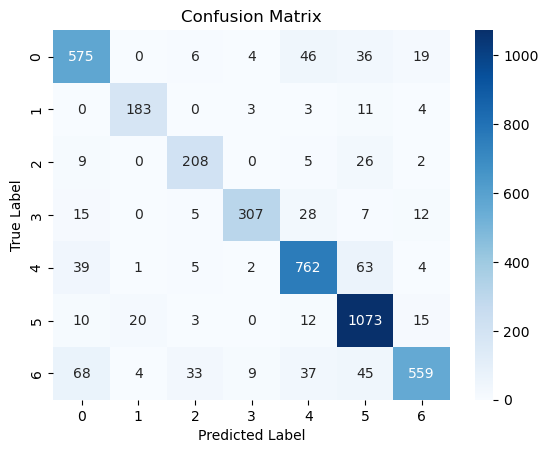

In [348]:
# calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:")

# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [327]:
# Define the SVM model
svm = SVC(kernel='linear')

# perform a grid search to find the best regularization parameter
params = {"C": [0.1, 1, 10]}
grid_search = GridSearchCV(svm_classifier, params, cv=8, n_jobs=-1)
grid_search.fit(list(X_train_w2v_norm), y_train)
best_C = grid_search.best_params_["C"]

# train the model on the testing data with best C
svm_classifier = SVC(C=best_C, kernel="linear")
svm.fit(X_train_vec, y_train)

# make predictions
y_pred_svm = svm.predict(X_test_vec)

# Calculate the classification report
report = classification_report(y_test, y_pred_svm)

# Print the report
print(report)

# store predicted values in a new dataframe
df_test['svm_preds'] = y_pred_svm

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       686
           1       0.87      0.91      0.89       204
           2       0.82      0.85      0.84       250
           3       0.90      0.84      0.87       374
           4       0.87      0.88      0.88       876
           5       0.90      0.92      0.91      1133
           6       0.92      0.82      0.87       755

    accuracy                           0.88      4278
   macro avg       0.87      0.87      0.87      4278
weighted avg       0.88      0.88      0.88      4278



Support Vector Machines Confusion Matrix:


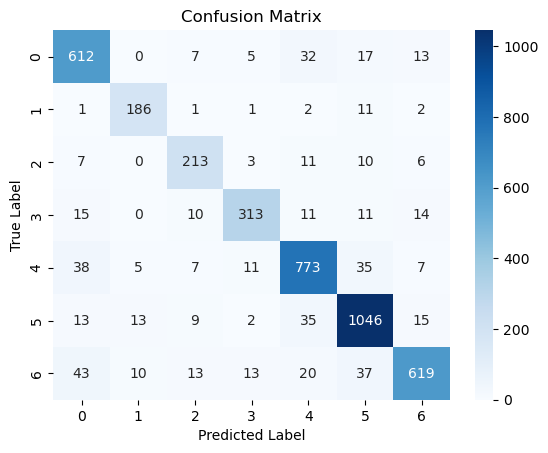

In [328]:
# calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred_svm)
print("Support Vector Machines Confusion Matrix:")
# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [307]:
# define the SVM classifier
svm_classifier = SVC(kernel="linear")

# perform a grid search to find the best regularization parameter
params = {"C": [0.1, 1, 10]}
grid_search = GridSearchCV(svm_classifier, params, cv=8, n_jobs=-1)
grid_search.fit(list(X_train_w2v_norm), y_train)
best_C = grid_search.best_params_["C"]

# train the SVM model on the training data
svm_classifier = SVC(C=best_C, kernel="linear")
svm_classifier.fit(list(X_train_w2v_norm), y_train)

# make predictions on the test data
y_pred = svm_classifier.predict(list(X_test_w2v_norm))

# evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       686
           1       0.95      0.89      0.92       204
           2       0.85      0.89      0.87       250
           3       0.93      0.91      0.92       374
           4       0.91      0.90      0.90       876
           5       0.90      0.95      0.93      1133
           6       0.93      0.85      0.89       755

    accuracy                           0.90      4278
   macro avg       0.90      0.90      0.90      4278
weighted avg       0.90      0.90      0.90      4278



Naive Bayes Confusion Matrix:


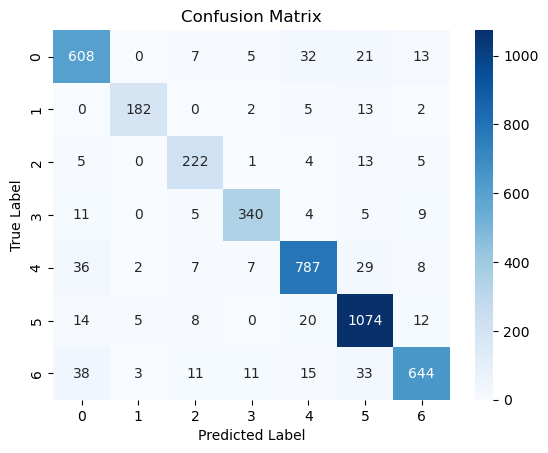

In [308]:
# calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
print("Naive Bayes Confusion Matrix:")

# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [231]:
df_full = pd.read_csv("C:/Users/rusta/Downloads/Litcovid dataset.csv")

In [371]:
# Create a bag of words using TF-IDF
tfidf_vectorizer = TfidfVectorizer(lowercase=True)
bag_of_words = tfidf_vectorizer.fit_transform(df_all['text_lg'])

# Apply topic modeling using LDA
lda = LatentDirichletAllocation(n_components=7)
lda.fit(bag_of_words)

# Get the topic distribution for each abstract
abstract_topic_distribution = lda.transform(bag_of_words)

# Print the top 10 keywords for each topic
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    feature_names = tfidf_vectorizer.get_feature_names_out()
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

# Store the topic index for each abstract in the dataframe
topic_indexes = []
for i in range(len(abstract_topic_distribution)):
    topic_index = abstract_topic_distribution[i].argmax()
    topic_indexes.append(topic_index)
    
df_all['topic_lda'] = topic_indexes
#df_test['topic_lda'] = df.loc[df_test.index, 'topic_lda']

Topic 0:
greenness microvilli hbcr teleglaucoma cd47 kovir khosta splashguard pyroglutamine mmym
Topic 1:
covid 19 patient sars cov study vaccine case infection disease
Topic 2:
febridx apeced ensitrelvir nimotuzumab aecopd psma melioidosis hinzii merv vitd
Topic 3:
igan ittp aird cov2ag caplacizumab pal bppv tapp rcfr prca
Topic 4:
dect ssnhl cper hcc spikogen hbcu teleaudiology noq19 enpatoran iief
Topic 5:
agvhd ltr dhp scribe dfm m1273 asahii pwcf denture drr
Topic 6:
seraph mbc rvu iepo cehc lipschutz microbind smartamp gwpr cov1901


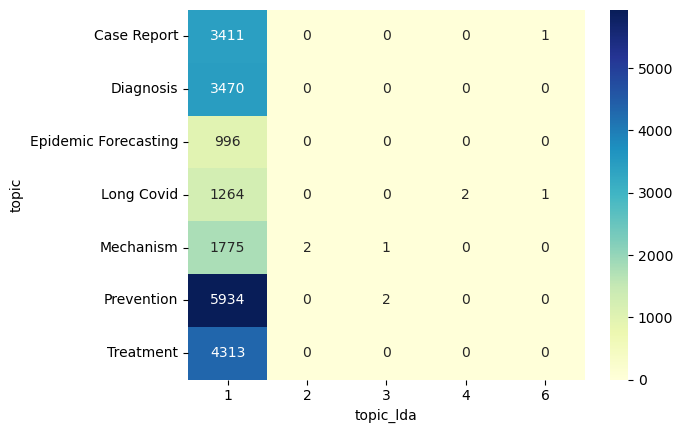

In [392]:
# cross tabulation
cross_tab = pd.crosstab(df_all['topic'], df_all['topic_lda'])
# create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')


print("\n\n")
# display the plot
plt.show()

In [393]:
df_all[df_all['topic_lda']!=1]

,pmid,text_lg,topic,topic_int,topic_lda,cluster_kmeans,language,w2v_vectors,topic_nmf,tokens,topic_id,topic_lsa,topic_name
2658,35729924,correct article 10.1007/s42843 00055,Long Covid,2,4,2,en,"[-0.8213382, 0.13508824, -0.35624778, -1.38274...",3,"[correct, article, 10.1007/s42843, 00055]",0,Topic A,Topic A
9035,34672705,abstract announce complete genome sequence sev...,Mechanism,3,2,2,en,"[-1.1761124, 0.30330798, -0.30230606, -0.32993...",2,"[abstract, announce, complete, genome, sequenc...",5,Topic F,Topic F
14803,32239522,abstract severe acute respiratory syndrome cor...,Mechanism,3,2,1,en,"[-0.43518254, -1.0478768, -0.50770646, -0.8677...",2,"[abstract, severe, acute, respiratory, syndrom...",5,Topic F,Topic F
15842,33477179,background video consultation support patient ...,Prevention,5,3,2,en,"[-0.8163229, 0.08671208, -0.60795575, -0.01720...",6,"[background, video, consultation, support, pat...",0,Topic A,Topic A
16494,33124612,effectiveness measure aim contain sars-cov-2 v...,Prevention,5,3,2,en,"[-0.59750384, 0.61615247, 0.061677888, -0.0523...",5,"[effectiveness, measure, aim, contain, sars-co...",0,Topic A,Topic A
16627,35928757,correct article 10.21037/atm-21 1438,Long Covid,2,6,2,en,"[-1.109967, 0.3198564, -0.24390316, -1.1599618...",3,"[correct, article, 10.21037/atm-21, 1438]",0,Topic A,Topic A
19985,36590468,correct article 10.1134/s1068162022060152,Long Covid,2,4,2,en,"[-1.0898968, 0.044507254, -0.5187538, -1.73918...",3,"[correct, article, 10.1134/s1068162022060152]",0,Topic A,Topic A
20470,35515083,abstract pathophysiology coagulopathy associat...,Case Report,0,6,2,en,"[-0.6417539, -0.54809064, -0.5620619, -0.10075...",0,"[abstract, pathophysiology, coagulopathy, asso...",0,Topic A,Topic A
20757,33406522,introduction sars-cov-2 type coronavirus cause...,Mechanism,3,3,1,en,"[-0.34470016, -0.94987094, -0.63410515, -0.735...",2,"[introduction, sars-cov-2, type, coronavirus, ...",5,Topic F,Topic F


In [322]:
# Create a bag of words using TF-IDF
count_vectorizer = CountVectorizer(stop_words = ['covid', '19'])
bag_of_words = count_vectorizer.fit_transform(df_all['text_lg'])

# Apply topic modeling using LDA
lda = LatentDirichletAllocation(n_components=7)
lda.fit(bag_of_words)

# Get the topic distribution for each abstract
abstract_topic_distribution = lda.transform(bag_of_words)

# Print the top 10 keywords for each topic
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    feature_names = tfidf_vectorizer.get_feature_names_out()
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

# Store the topic index for each abstract in the dataframe
topic_indexes = []
for i in range(len(abstract_topic_distribution)):
    topic_index = abstract_topic_distribution[i].argmax()
    topic_indexes.append(topic_index)
    
#df_all['topic_lda'] = topic_indexes
#df_test['topic_lda'] = df.loc[df_test.index, 'topic_lda']

Topic 0:
casdetect modeb healtcare dattatri 202 pandemia numb timbs countrwise populate
Topic 1:
sarraj couzin tessitore sampere resucitate detectible positionstatement2020 modeb assawasaksakul rsyltpgd246
Topic 2:
studiesqualitative patience healtcare pandemia participact cardwell groundwork risingiv higginson reporedly
Topic 3:
masjedi virulome surf studiesqualitative drude participatory effecacy higginson olfactor incr
Topic 4:
couzin sarraj protego celis virulome sequels mutated variances humaira gendx
Topic 5:
vaccinazione_anti_covid sarraj couzin infectiologists patience celis dosages vaccinating studiesqualitative antibodiesteste
Topic 6:
patience casdetect diseaese studiesqualitative clinicaitrials treatlist reporedly infectiologists respirators severance


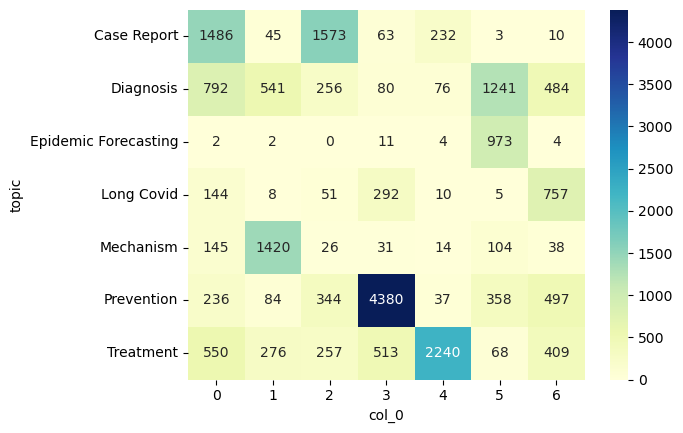

In [321]:
# cross tabulation
cross_tab = pd.crosstab(df_all['topic'], topic_indexes)
# create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

# display the plot
plt.show()

In [234]:
df_all

,pmid,text_lg,topic,topic_int,topic_lda,cluster_kmeans,language
0,36301867,nurse play important role pandemic disaster re...,Prevention,5,4,6,en
1,33535066,spread sars-cov-2 result disease covid-19 kill...,Prevention,5,4,4,en
2,35848556,covid-19 crisis long-term care canada characte...,Prevention,5,4,6,en
3,36631172,paper apply statistical method functional datu...,Epidemic Forecasting,1,4,2,en
4,36777001,pandemic coronavirus cause respiratory enteric...,Mechanism,3,4,0,en
...,...,...,...,...,...,...,...
21167,34249807,describe case series child sars-cov-2 infectio...,Case Report,0,4,4,en
21168,32360497,highlights failure anticipate spread sars-cov-...,Epidemic Forecasting,1,4,4,en
21169,32053470,background chest assess severity lung involvem...,Mechanism,3,4,5,en
21170,35418288,time covid19 epidemic/pandemic cardiac patient...,Prevention,5,4,4,en


In [332]:
vectorizer = TfidfVectorizer(stop_words=['covid','19'], lowercase=True)
X = vectorizer.fit_transform(df_all['text_lg'])

In [333]:
n_clusters = 7
n_init = 40
state = -1
best_silhouette = -1
best_model = None

for i in range(n_init):
    kmeans = KMeans(n_clusters=n_clusters, random_state=i)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_model = kmeans
        state = i 

print(f"Best Silhouette Score: {best_silhouette}, iter: {state}")#0.00969180621841187

Best Silhouette Score: 0.009942525393010215, iter: 25


In [334]:
labels = best_model.labels_
df_all['cluster_kmeans'] = labels
# Adding topic_idx column to df_test and copying values from df
#df_test['cluster_kmeans'] = df.loc[df_test.index, 'cluster_kmeans']

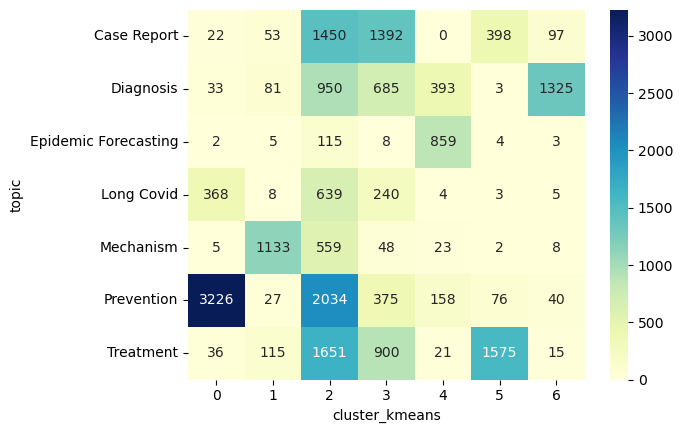

In [335]:
# cross tabulation
cross_tab = pd.crosstab(df_all['topic'], df_all['cluster_kmeans'])
# create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

# display the plot
plt.show()

In [239]:
# Select the columns you need from df_all
df_all_subset = df_all[['pmid', 'topic_lda']]

# Merge df_test with df_all_subset using the 'pmid' column as the key
df_test = pd.merge(df_test, df_all_subset, on='pmid', how='left')

In [240]:
# Select the columns you need from df_all
df_all_subset = df_all[['pmid', 'cluster_kmeans']]

# Merge df_test with df_all_subset using the 'pmid' column as the key
df_test = pd.merge(df_test, df_all_subset, on='pmid', how='left')

In [248]:
df_test

,pmid,topic,abstract_lg,topic_int,bert_preds,nb_preds,svm_preds,topic_lda,cluster_kmeans
0,35949757,Case Report,mucormycosis opportunistic fungal infection ca...,0,0,0,0,4.0,6.0
1,36610390,Treatment,nasal mucosa important initial site host defen...,4,4,4,4,4.0,6.0
2,35148261,Mechanism,objective modification common ribonucleic acid...,3,3,3,3,4.0,2.0
3,32925503,Case Report,oligosymptomatic patient initially exclusively...,0,0,0,0,4.0,3.0
4,35690403,Prevention,model propose increase access home dialysis tr...,5,5,5,5,4.0,6.0
...,...,...,...,...,...,...,...,...,...
4273,33871421,Long Covid,purpose review despite significant progress un...,2,2,4,4,4.0,6.0
4274,32804803,Prevention,background coronavirus disease covid-19 pandem...,5,5,5,5,4.0,6.0
4275,36002399,Long Covid,people survive covid-19 experience negative pe...,2,2,2,2,4.0,1.0
4276,35252760,Diagnosis,deadly novel coronavirus sars-cov-2 responsibl...,6,6,6,6,4.0,0.0


In [104]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21388 entries, 0 to 21387
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pmid            21388 non-null  int64 
 1   topic           21388 non-null  object
 2   abstract_lg     21388 non-null  object
 3   topic_int       21388 non-null  int64 
 4   topic_lda       21388 non-null  int64 
 5   cluster_kmeans  21388 non-null  int32 
dtypes: int32(1), int64(3), object(2)
memory usage: 919.1+ KB


In [ ]:
# Standardize features
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Set DBSCAN parameters
eps = 0.5
min_samples = 5

# Perform DBSCAN clustering
db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(X_scaled)
labels = db.labels_

# Get number of clusters (ignoring noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

# Attach cluster labels to dataset
df_all['cluster'] = labels

In [ ]:
# cross tabulation
cross_tab = pd.crosstab(df_all['topic'], df_all['topic_nmf'])
# create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

# display the plot
plt.show()

In [373]:
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenize the preprocessed text
df_all['tokens'] = df_all['text_lg'].apply(lambda x: x.split())

# Create a Gensim dictionary
gensim_dict = Dictionary(df_all['tokens'])

# Convert documents to Gensim bag-of-words format
corpus = [gensim_dict.doc2bow(text) for text in df_all['tokens']]

# Train multiple NMF models
n_topics = 7
n_top_words = 15
n_iterations = 10
best_coherence = -np.inf
best_nmf = None
best_topic_assignments = None
best_topics = []

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=['covid', '19'])
tfidf_matrix = vectorizer.fit_transform(df_all['text_lg'])
feature_names = vectorizer.get_feature_names_out()

for iteration in range(n_iterations):
    print(f"Iteration {iteration + 1}")
    nmf = NMF(n_components=n_topics, random_state=iteration)
    nmf.fit(tfidf_matrix)
    
    topics = []
    for topic_idx, topic in enumerate(nmf.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(topic_words)

    # Calculate topic coherence
    coherence_model = CoherenceModel(topics=topics, texts=df_all['tokens'], dictionary=gensim_dict, coherence='c_v')
    coherence = coherence_model.get_coherence()
    
    if coherence > best_coherence:
        best_coherence = coherence
        best_nmf = nmf
        best_topic_assignments = nmf.transform(tfidf_matrix)
        best_topics = topics
    print("\n")

print(f"Best coherence score: {coherence}")
print("Best model topics:")
for idx, topic in enumerate(best_topics):
    print(f"Topic #{idx}:")
    print(" ".join(topic))

df_all['topic_nmf'] = best_topic_assignments.argmax(axis=1)


Iteration 1


C:\Users\rusta\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(




Iteration 2


C:\Users\rusta\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(




Iteration 3


C:\Users\rusta\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(




Iteration 4


C:\Users\rusta\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(




Iteration 5


C:\Users\rusta\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(




Iteration 6


C:\Users\rusta\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(




Iteration 7


C:\Users\rusta\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(




Iteration 8


C:\Users\rusta\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(




Iteration 9


C:\Users\rusta\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(




Iteration 10


C:\Users\rusta\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(




Best coherence score: 0.631095099012778
Best model topics:
Topic #0:
patient case treatment disease clinical severe respiratory infection acute report pneumonia therapy coronavirus day lung
Topic #1:
vaccine vaccination dose mrna vaccinate bnt162b2 antibody booster response receive hesitancy adverse pfizer safety 2021
Topic #2:
cov sars protein variant virus cell mutation sequence genome spike infection viral human coronavirus ace2
Topic #3:
study symptom group participant anxiety 001 child depression post score analysis long mental cognitive risk
Topic #4:
model case datum image learning number prediction propose epidemic forecast parameter time dataset network death
Topic #5:
test cov sars rt sample assay pcr positive detection antibody sensitivity testing negative swab diagnostic
Topic #6:
health care pandemic service healthcare public telemedicine social patient telehealth visit practice community system need


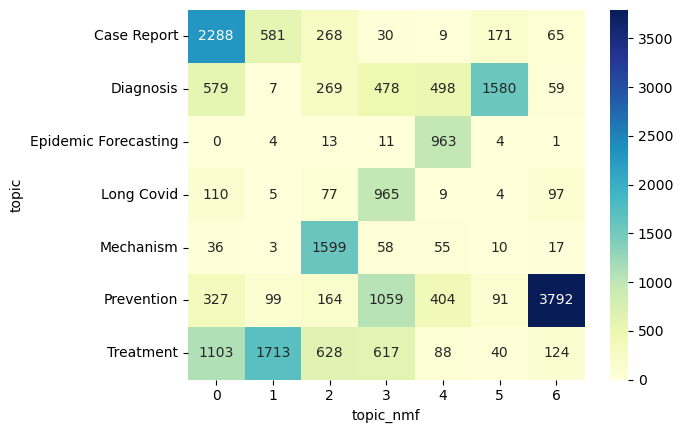

In [374]:
# cross tabulation
cross_tab = pd.crosstab(df_all['topic'], df_all['topic_nmf'])
# create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

print("\n\n")
# display the plot
plt.show()

In [375]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline


In [376]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')

In [377]:
lsa_model = TruncatedSVD(n_components=10)

In [378]:
lsa_pipeline = Pipeline([    ('tfidf', tfidf_vectorizer),    ('lsa', lsa_model)])

In [379]:
lsa_features = lsa_pipeline.fit_transform(df_all['text_lg'])

In [388]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

# Load the data
#df_all = pd.read_csv('covid19_papers.csv')

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')

# Create a TruncatedSVD object
lsa_model = TruncatedSVD(n_components=7)

# Create a Pipeline object
lsa_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lsa', lsa_model)
])

# Fit the Pipeline object to the text data
lsa_features = lsa_pipeline.fit_transform(df_all['text_lg'])

# Assign the topics to the rows in df_all
df_all['topic_id'] = np.argmax(lsa_features, axis=1)

# Assign descriptive topic names using a dictionary
topic_names = {0: 'Topic A', 1: 'Topic B', 2: 'Topic C', 3: 'Topic D', 4: 'Topic E', 5: 'Topic F', 6: 'Topic G'}
df_all['topic_name'] = df_all['topic_id'].map(topic_names)

# Print the top words for each topic
terms = tfidf_vectorizer.get_feature_names()
for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:10]
    print(f"Topic {chr(i + ord('A'))}:")
    for t in sorted_terms:
        print(t[0])
    print()


C:\Users\rusta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic A:
vaccine
health
vaccination
test
clinical
symptom
2020
model
care
datum

Topic B:
vaccine
vaccination
dose
mrna
vaccinate
bnt162b2
antibody
booster
hesitancy
pfizer

Topic C:
antibody
protein
cell
assay
rt
sample
viral
virus
test
pcr

Topic D:
model
variant
sample
mutation
sequence
prediction
detection
number
learning
datum

Topic E:
test
rt
sample
assay
pcr
positive
antibody
health
testing
detection

Topic F:
mutation
variant
protein
cell
sequence
virus
genome
spike
health
ace2

Topic G:
symptom
variant
group
mutation
omicron
001
anxiety
depression
child
2020



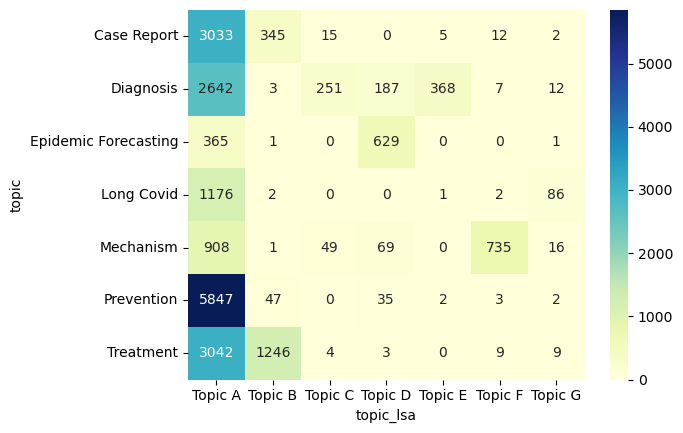

In [389]:
# cross tabulation
cross_tab = pd.crosstab(df_all['topic'], df_all['topic_lsa'])
# create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

print("\n\n")
# display the plot
plt.show()